- you can test each algorithm on each dataset by excuting the corresponding section
- K_d:概率密度估计时使用的k近邻大小，关键参数，控制密度的平滑性。Kd变大则密度更平滑。0.2*sqrt(N)<K_d<sqrt(N),步进5,N是总样本数。
- K_s=20: 新生点寻找父亲节点时，“可见邻域”的大小。0.5K_d<K_s<K_d,步进5。
- alpha=0.4: drop掉40%的较弱边。选择：0.1,0.2,0.3,0.4
- epsilon=100：判别噪音簇，在最终的分簇里面，如果簇内点数少于epsilon，则该簇为噪音。

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from measures import matchY,measures_calculator
import api
imp.reload(api)

<module 'api' from '../utils/api.py'>

In [4]:
class DataLoader:
    def __init__(self):
        pass
    
    @classmethod
    def load(self,name):
        if name== 'circles':
            df=pd.read_csv('./artificial_csv/circles_0.1_noise.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='moons':
            df=pd.read_csv('./artificial_csv/moons_0.15_noise.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='impossible':
            df=pd.read_csv('./artificial_csv/impossible_plus.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='s-set':
            df=pd.read_csv('./artificial_csv/s-set1.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='smile':
            df=pd.read_csv('./artificial_csv/smile1.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true

# GDT

## circles

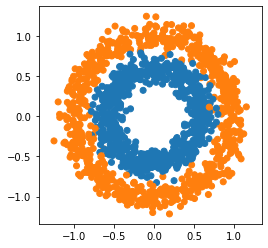

In [35]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1500, noise=0.09, factor=0.6)
plot_tools.autoPlot(X,y)

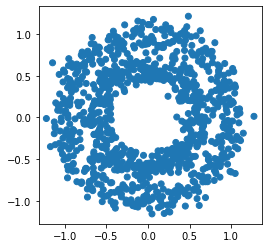

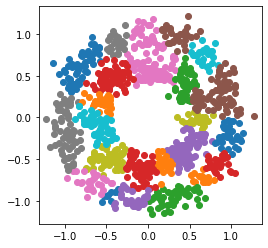

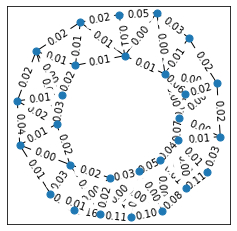

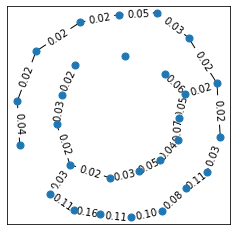

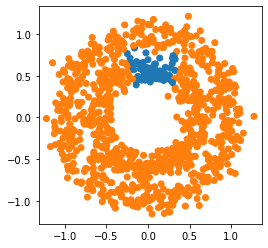

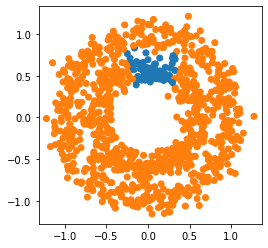

,f1,ARI,ACC,cover_rate,classes
0,0.468001,0.016634,0.565,1.0,2.0


In [7]:
X,Y_true=DataLoader.load('circles')

Y_pred=api.DGSFC.fit(  X,
                  K_d=20,
                  K_s=20,
                  alpha=0.2,
                  epsilon=0,
                  plot=True,
                 )
plot_tools.autoPlot(X,Y_pred)

Y_pred,Y_true=matchY(Y_pred,Y_true)

result=measures_calculator(Y_true, Y_pred)
result

## moons

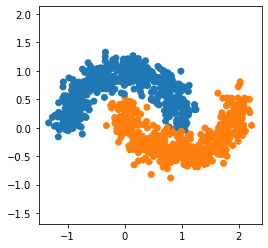

,f1,ARI,ACC,cover_rate,classes
0,0.980998,0.925369,0.981,1.0,2.0


In [28]:
X,Y_true=DataLoader.load('moons')

Y_pred=api.DGSFC.fit(  X,
                  K_d=50,
                  K_s=40,
                  alpha=0.1,
                  epsilon=0,
                  plot=False,
                 )
plot_tools.autoPlot(X,Y_pred)

Y_pred,Y_true=matchY(Y_pred,Y_true)

result=measures_calculator(Y_true, Y_pred)
result

## impossible

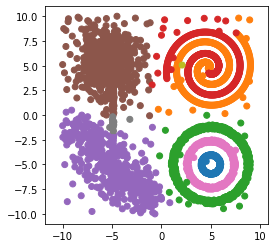

,f1,ARI,ACC,cover_rate
0,0.999443,0.998977,0.999166,1.0


In [5]:
X,Y_true=DataLoader.load('impossible')

Y_pred=api.DGSFC.fit(  X,
                  K_d=30,
                  K_s=10,
                  alpha=0.2,
                  epsilon=0,
                  plot=False,
                 )
plot_tools.autoPlot(X,Y_pred,seed=2022)

Y_pred,Y_true=matchY(Y_pred,Y_true)

result=measures_calculator(Y_true, Y_pred)
result

## s-set

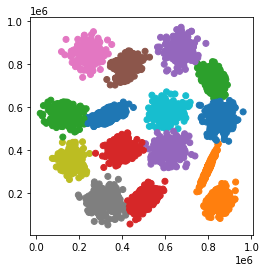

,f1,ARI,ACC,cover_rate
0,0.9988,0.997433,0.9988,1.0


In [6]:
X,Y_true=DataLoader.load('s-set')

Y_pred=api.DGSFC.fit(  X,
                  K_d=15,
                  K_s=15,
                  alpha=0.2,
                  epsilon=0,
                  plot=False,
                 )
plot_tools.autoPlot(X,Y_pred,seed=2019)

Y_pred,Y_true=matchY(Y_pred,Y_true)

result=measures_calculator(Y_true, Y_pred)
result

## smile

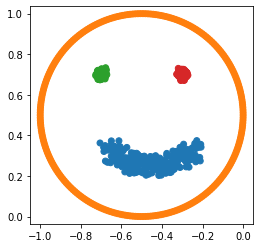

,f1,ARI,ACC,cover_rate
0,1.0,1.0,1.0,1.0


In [7]:
X,Y_true=DataLoader.load('smile')

Y_pred=api.DGSFC.fit(  X,
                  K_d=15,
                  K_s=15,
                  alpha=0.2,
                  epsilon=0,
                  plot=False,
                 )

plot_tools.autoPlot(X,Y_pred,seed=2019)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# HDBSCAN

In [8]:
import hdbscan

## circles

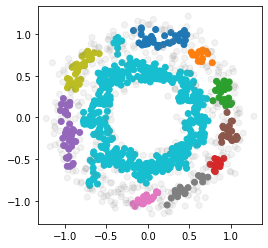

,f1,ARI,ACC,cover_rate
0,0.738737,0.816202,0.711684,0.659


In [9]:
X,Y_true=DataLoader.load('circles')
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=10)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

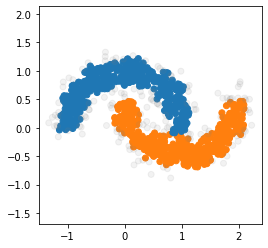

,f1,ARI,ACC,cover_rate
0,0.991889,0.967781,0.991889,0.863


In [574]:
X,Y_true=DataLoader.load('moons')
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=11)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

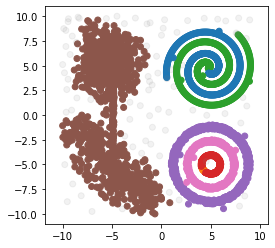

,f1,ARI,ACC,cover_rate
0,0.823548,0.801031,0.871265,0.996106


In [575]:
X,Y_true=DataLoader.load('impossible')
clusterer = hdbscan.HDBSCAN(min_cluster_size=11, min_samples=5)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

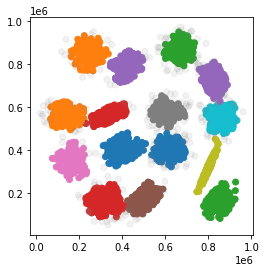

,f1,ARI,ACC,cover_rate
0,0.99875,0.997337,0.998751,0.9608


In [10]:
X,Y_true=DataLoader.load('s-set')
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=10)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

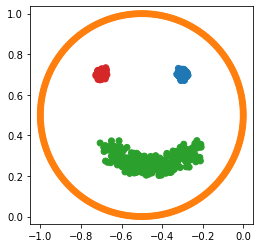

,f1,ARI,ACC,cover_rate
0,1.0,1.0,1.0,1.0


In [577]:
X,Y_true=DataLoader.load('smile')
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=10)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# mean-shift

In [14]:
from sklearn.cluster import MeanShift, estimate_bandwidth

## circles

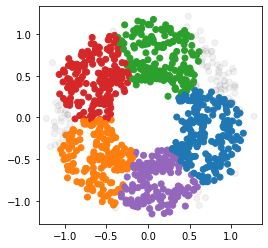

,f1,ARI,ACC,cover_rate
0,0.306954,-0.002635,0.220637,0.911


In [578]:
X,Y_true=DataLoader.load('circles')
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred=ms.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

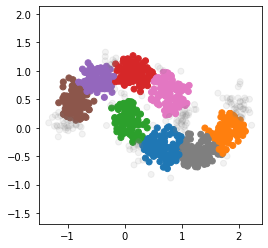

,f1,ARI,ACC,cover_rate
0,0.431883,0.07111,0.27863,0.847


In [579]:
X,Y_true=DataLoader.load('moons')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred=ms.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

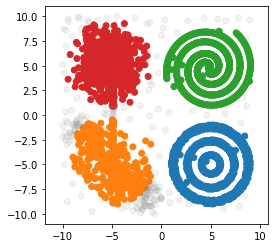

,f1,ARI,ACC,cover_rate
0,0.569448,0.648216,0.677086,0.969958


In [580]:
X,Y_true=DataLoader.load('impossible')
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred=ms.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

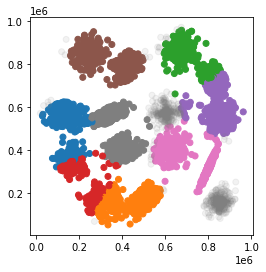

,f1,ARI,ACC,cover_rate
0,0.450178,0.614813,0.58574,0.8724


In [581]:
X,Y_true=DataLoader.load('s-set')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred=ms.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

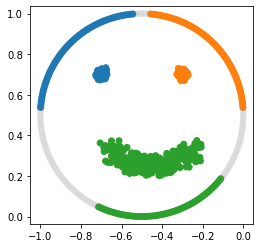

,f1,ARI,ACC,cover_rate
0,0.734711,0.707849,0.816993,0.918


In [582]:
X,Y_true=DataLoader.load('smile')
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred=ms.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# OPTICS

In [310]:
from sklearn.cluster import OPTICS

## circles

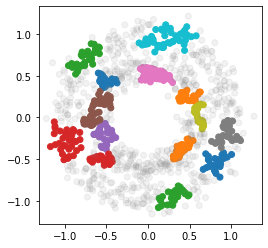

,f1,ARI,ACC,cover_rate
0,0.353279,0.04668,0.215777,0.431


In [583]:
X,Y_true=DataLoader.load('circles')
clustering = OPTICS(min_samples=2,min_cluster_size=20).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

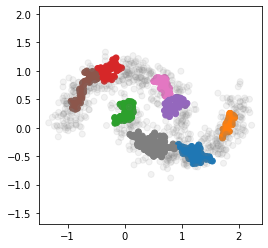

,f1,ARI,ACC,cover_rate
0,0.541198,0.132084,0.37296,0.429


In [584]:
X,Y_true=DataLoader.load('moons')
clustering = OPTICS(min_samples=2,min_cluster_size=30).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

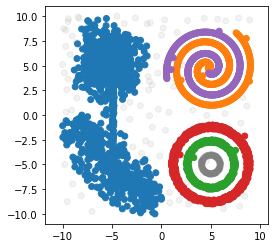

,f1,ARI,ACC,cover_rate
0,0.811023,0.790345,0.864938,0.92267


In [585]:
X,Y_true=DataLoader.load('impossible')
clustering = OPTICS(min_samples=5,min_cluster_size=400).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

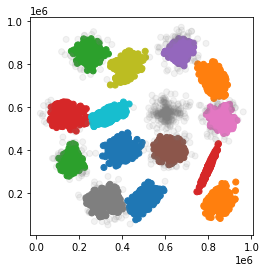

,f1,ARI,ACC,cover_rate
0,0.999554,0.999066,0.999554,0.896


In [586]:
X,Y_true=DataLoader.load('s-set')
clustering = OPTICS(min_samples=10,min_cluster_size=300).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

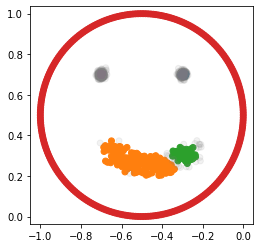

,f1,ARI,ACC,cover_rate
0,0.959443,0.901774,0.927215,0.632


In [587]:
X,Y_true=DataLoader.load('smile')
clustering = OPTICS(min_samples=3,min_cluster_size=40).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# spectral clustering

In [20]:
from sklearn.cluster import SpectralClustering

## circles

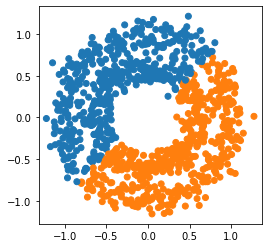

,f1,ARI,ACC,cover_rate
0,0.507929,-0.000745,0.508,1.0


In [588]:
X,Y_true=DataLoader.load('circles')
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors','rbf'
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

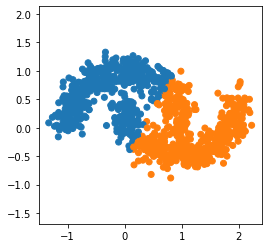

,f1,ARI,ACC,cover_rate
0,0.771955,0.295231,0.772,1.0


In [589]:
X,Y_true=DataLoader.load('moons')
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

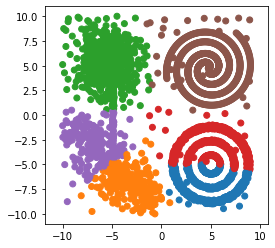

,f1,ARI,ACC,cover_rate
0,0.558755,0.632366,0.594437,1.0


In [590]:
X,Y_true=DataLoader.load('impossible')
clustering = SpectralClustering(n_clusters=6,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



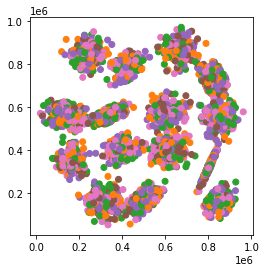

,f1,ARI,ACC,cover_rate
0,0.041621,-0.000112,0.0808,1.0


In [24]:
X,Y_true=DataLoader.load('s-set')
clustering = SpectralClustering(n_clusters=15,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

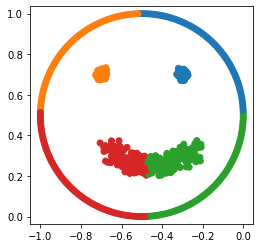

,f1,ARI,ACC,cover_rate
0,0.675486,0.552385,0.703,1.0


In [25]:
X,Y_true=DataLoader.load('smile')
clustering = SpectralClustering(n_clusters=4,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# k-means

In [29]:
from sklearn.cluster import KMeans

## circles

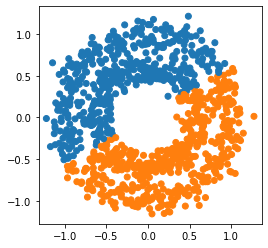

,f1,ARI,ACC,cover_rate
0,0.501839,-0.000985,0.502,1.0


In [30]:
X,Y_true=DataLoader.load('circles')
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

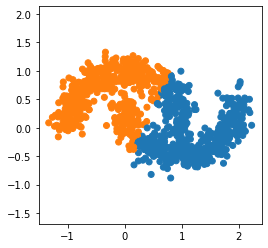

,f1,ARI,ACC,cover_rate
0,0.757938,0.265522,0.758,1.0


In [34]:
X,Y_true=DataLoader.load('moons')
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

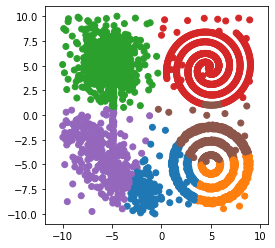

,f1,ARI,ACC,cover_rate
0,0.481897,0.621796,0.519054,1.0


In [358]:
X,Y_true=DataLoader.load('impossible')
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

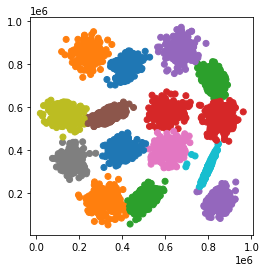

,f1,ARI,ACC,cover_rate
0,0.997603,0.994963,0.9976,1.0


In [94]:
X,Y_true=DataLoader.load('s-set')
kmeans = KMeans(n_clusters=15, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

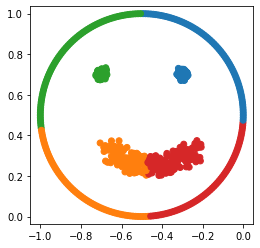

,f1,ARI,ACC,cover_rate
0,0.665563,0.546821,0.696,1.0


In [95]:
X,Y_true=DataLoader.load('smile')
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# Quickshift++

In [7]:
from QuickshiftPP import *

/usr/data/software/Anaconda/envs/ML/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



## circles

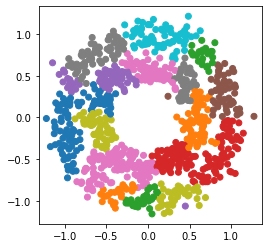

,f1,ARI,ACC,cover_rate
0,0.147875,0.049061,0.092,1.0


In [8]:
X,Y_true=DataLoader.load('circles')
model = QuickshiftPP(k=10,beta=0.4)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

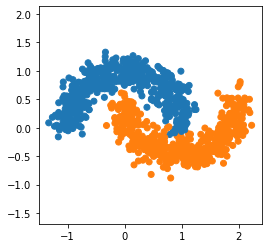

,f1,ARI,ACC,cover_rate
0,0.985,0.940841,0.985,1.0


In [9]:
X,Y_true=DataLoader.load('moons')
model = QuickshiftPP(k=16,beta=0.7)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

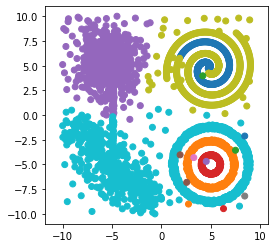

,f1,ARI,ACC,cover_rate
0,0.785858,0.790048,0.833936,1.0


In [10]:
X,Y_true=DataLoader.load('impossible')
model = QuickshiftPP(k=15,beta=0.9)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

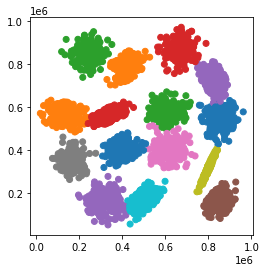

,f1,ARI,ACC,cover_rate
0,0.9978,0.995374,0.9978,1.0


In [11]:
X,Y_true=DataLoader.load('s-set')
model = QuickshiftPP(k=15,beta=0.9)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

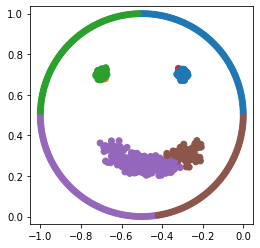

,f1,ARI,ACC,cover_rate
0,0.705631,0.568948,0.742,1.0


In [12]:
X,Y_true=DataLoader.load('smile')
model = QuickshiftPP(k=15,beta=0.4)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result